<a href="https://colab.research.google.com/github/dzeko5959/AI/blob/main/ML/UDEM/A3_2_679212_SeunghyeonLee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load and prepare the MNIST data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**2. Create the neural network model**

In [ ]:
model = Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**3. Train the model**

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8662 - loss: 0.4565 - val_accuracy: 0.9621 - val_loss: 0.1298
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9681 - loss: 0.1115 - val_accuracy: 0.9707 - val_loss: 0.0988
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9763 - loss: 0.0765 - val_accuracy: 0.9722 - val_loss: 0.0969
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9839 - loss: 0.0516 - val_accuracy: 0.9719 - val_loss: 0.0877
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9860 - loss: 0.0434 - val_accuracy: 0.9735 - val_loss: 0.0977
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9888 - loss: 0.0324 - val_accuracy: 0.9728 - val_loss: 0.1060
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9911 - loss: 0.0266 - val_accuracy: 0.9745 - val_loss: 0.0992
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9929 - loss: 0.020

**4. Visualize the training results**

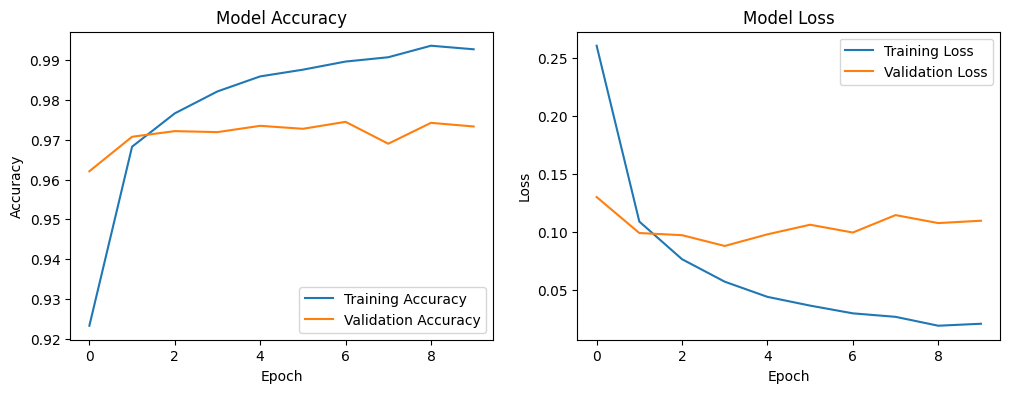

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Although it has been learned very well in the training data, some overfitting has begun to appear for the verification data.

**5. Evaluate the model on the test set**

In [ ]:
loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.1165

Test accuracy: 0.9760


Validation and Test acuity are similar, so the model is well trained, and it is stable on new data

**6. Create 50 images (5 per digit) and preprocess them**

In [ ]:
sampled_images = []
sampled_labels = []

for digit in range(10):
    idx = np.where(y_test == digit)[0][:5]
    sampled_images.append(x_test[idx])
    sampled_labels.append(y_test[idx])

sampled_images = np.concatenate(sampled_images)
sampled_labels = np.concatenate(sampled_labels)

**7. Evaluate model performance on the new images**

In [ ]:
predictions = model.predict(sampled_images)
pred_labels = np.argmax(predictions, axis=1)

accuracy_new_images = np.mean(pred_labels == sampled_labels)
print(f"Accuracy on the 50 new images: {accuracy_new_images:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Accuracy on the 50 new images: 0.9800


The model achieved 98% accuracy on the 50 new images, demonstrating strong generalization ability. However, potential errors could arise due to digits that are poorly written, ambiguous, or visually similar to other digits. Small distortions, incomplete strokes, or unusual handwriting styles might also confuse the model, leading to occasional misclassifications.

**8. Suggested Innovations / Improvements**

1. Modify the model architecture by adding a Convolutional Layer:
Adding a convolutional layer at the beginning of the model can help the network learn spatial features from the images more effectively. Convolutional layers are excellent at capturing edges, patterns, and structures, which can lead to better generalization and improved accuracy compared to a simple dense network.

2. Apply Data Augmentation:
Using data augmentation techniques such as random rotations, shifts, or zooms on the training images can make the model more robust. This helps the model to generalize better by learning from a wider variety of slightly altered data, reducing the risk of overfitting and improving performance on unseen data.

3. Implement EarlyStopping during training:
EarlyStopping can be used to monitor the validation loss during training. If the validation loss stops improving for a defined number of epochs, the training will automatically stop. This technique prevents overfitting by ensuring that the model does not continue to memorize the training data once it stops learning useful patterns.

**9. Save and download the model**

In [ ]:
model.save('mnist_model_fixed.h5', save_format='h5')

In [ ]:
from google.colab import files
files.download('mnist_model_fixed.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>